<a href="https://colab.research.google.com/github/NxrFesdac/bourbaki-nlp-avanzado/blob/main/modulo3/Embeddings_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# If you need installs in the notebook, uncomment:
!pip -q install numpy scipy scikit-learn matplotlib gensim torch transformers sentence-transformers datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 31.8 MB/s eta 0:00:00


In [ ]:
import numpy as np

In [ ]:
import gensim.downloader as api

# Nearest neighbors (pretrained word vectors)
wv = api.load("glove-wiki-gigaword-100")

words = ["apple", "bank", "python", "jaguar", "doctor", "sad", "music"]

for w in words:
    print("\n" + "="*50)
    print("Word:", w)
    if w in wv:
        for nbr, sim in wv.most_similar(w, topn=10):
            print(f"{nbr:15s} {sim:.3f}")
    else:
        print("(not in vocabulary)")

[==================================================] 100.0% 128.1/128.1MB downloaded

Word: apple
microsoft       0.745
ibm             0.682
intel           0.678
software        0.678
dell            0.674
pc              0.668
macintosh       0.662
iphone          0.660
ipod            0.653
hewlett         0.652

Word: bank
banks           0.806
banking         0.753
credit          0.704
investment      0.694
financial       0.678
securities      0.669
lending         0.665
funds           0.648
ubs             0.648
finance         0.646

Word: python
monty           0.689
php             0.587
perl            0.578
cleese          0.545
flipper         0.511
ruby            0.507
spamalot        0.506
javascript      0.503
reticulated     0.498
monkey          0.498

Word: jaguar
rover           0.749
mustang         0.666
cadillac        0.618
taurus          0.605
subaru          0.599
bmw             0.593
falcon          0.589
volvo           0.589
xk8             0.587
ford

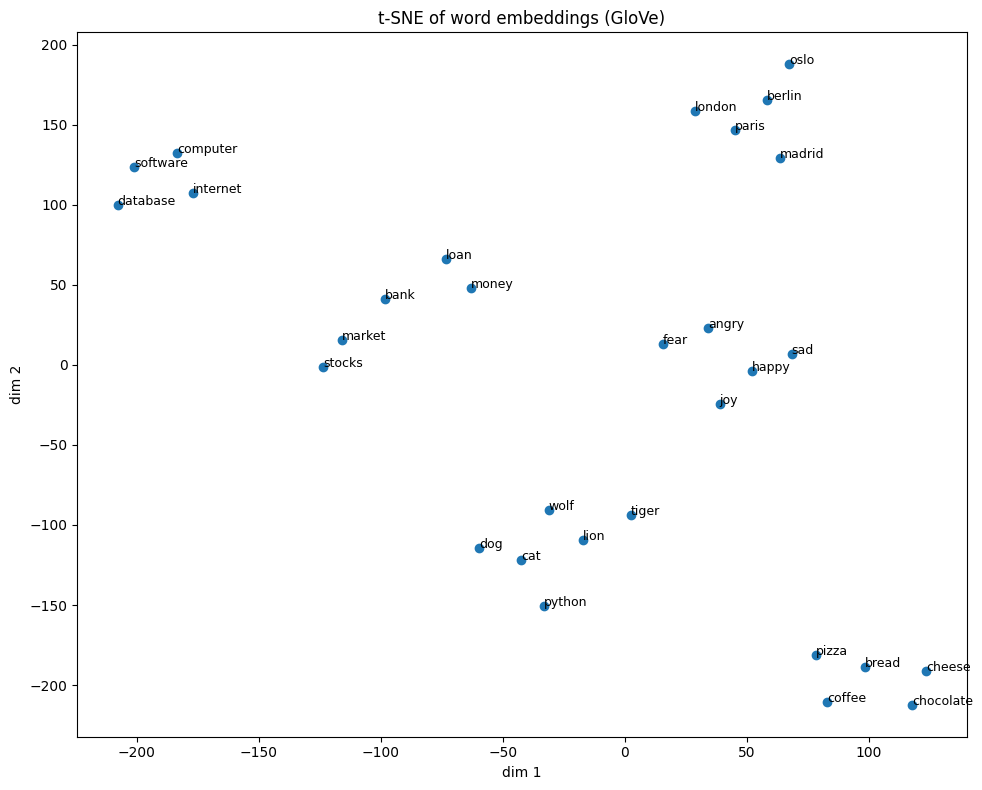

In [ ]:
import gensim.downloader as api
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Visualize clusters (t-SNE)

words = [
    "cat","dog","wolf","tiger","lion",
    "paris","london","berlin","oslo","madrid",
    "computer","software","internet","python","database",
    "pizza","bread","cheese","chocolate","coffee",
    "happy","sad","angry","fear","joy",
    "bank","money","loan","stocks","market",
]

kept = [w for w in words if w in wv]
X = np.array([wv[w] for w in kept])

Y = TSNE(n_components=2, perplexity=5, random_state=0, init="pca").fit_transform(X)

plt.figure(figsize=(10, 8))
plt.scatter(Y[:, 0], Y[:, 1])

for i, w in enumerate(kept):
    plt.text(Y[i, 0], Y[i, 1], w, fontsize=9)

plt.title("t-SNE of word embeddings (GloVe)")
plt.xlabel("dim 1"); plt.ylabel("dim 2")
plt.tight_layout()
plt.show()

In [ ]:
import gensim.downloader as api

# “Domain shift” using two different GloVe corpora
wiki = api.load("glove-wiki-gigaword-100")
tw   = api.load("glove-twitter-100")

probe_words = ["virus", "cloud", "java", "python", "apple", "bank", "model", "screen"]

for w in probe_words:
    print("\n" + "="*60)
    print("Word:", w)

    print("\nWiki/Gigaword neighbors:")
    if w in wiki:
        for t, s in wiki.most_similar(w, topn=8):
            print(f"  {t:15s} {s:.3f}")
    else:
        print("  (OOV)")

    print("\nTwitter neighbors:")
    if w in tw:
        for t, s in tw.most_similar(w, topn=8):
            print(f"  {t:15s} {s:.3f}")
    else:
        print("  (OOV)")


[==================================================] 100.0% 387.1/387.1MB downloaded

Word: virus

Wiki/Gigaword neighbors:
  flu             0.840
  influenza       0.819
  h5n1            0.813
  viruses         0.796
  infected        0.792
  infection       0.786
  disease         0.782
  avian           0.763

Twitter neighbors:
  malware         0.688
  hepatitis       0.647
  influenza       0.631
  flu             0.610
  anti            0.609
  hiv             0.603
  hacker          0.596
  tumor           0.583

Word: cloud

Wiki/Gigaword neighbors:
  clouds          0.767
  ash             0.712
  dust            0.664
  sky             0.620
  mist            0.615
  fog             0.602
  shadow          0.586
  smoke           0.586

Twitter neighbors:
  enterprise      0.730
  computing       0.706
  windows         0.689
  mobile          0.676
  technology      0.669
  tech            0.669
  software        0.666
  space           0.657

Word: java

Wiki/Gigaword ne

In [ ]:
import gensim.downloader as api

# “Hyperparameter effects” with GloVe dimensions
g50  = api.load("glove-wiki-gigaword-50")
g100 = api.load("glove-wiki-gigaword-100")
g200 = api.load("glove-wiki-gigaword-200")

probe = ["king", "queen", "bank", "music", "computer", "river", "money", "war"]

models = [
    ("GloVe 50d",  g50),
    ("GloVe 100d", g100),
    ("GloVe 200d", g200),
]

for name, wv in models:
    print("\n" + "="*70)
    print(name)

    for w in probe:
        print("\nWord:", w)
        if w in wv:
            for t, s in wv.most_similar(w, topn=6):
                print(f"  {t:15s} {s:.3f}")
        else:
            print("  (OOV)")


[==================================================] 100.0% 66.0/66.0MB downloaded
[==================================================] 100.0% 252.1/252.1MB downloaded

GloVe 50d

Word: king
  prince          0.824
  queen           0.784
  ii              0.775
  emperor         0.774
  son             0.767
  uncle           0.763

Word: queen
  princess        0.852
  lady            0.805
  elizabeth       0.787
  king            0.784
  prince          0.782
  coronation      0.769

Word: bank
  banks           0.870
  securities      0.800
  banking         0.797
  investment      0.785
  exchange        0.781
  financial       0.767

Word: music
  musical         0.885
  pop             0.868
  dance           0.853
  songs           0.853
  recording       0.839
  folk            0.832

Word: computer
  computers       0.917
  software        0.881
  technology      0.853
  electronic      0.813
  internet        0.806
  computing       0.803

Word: river
  rivers          0.87